# Relatório de Análise VII

## Criando Agrupamentos

In [4]:
import pandas as pd

In [5]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep = ';')

In [113]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Casa
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento


In [114]:
dados['Valor'].mean()

5046.172821405663

In [115]:
##### https://pandas.pydata.org/pandas-docs/stable/reference/frame.html

In [116]:
# Verificar dados de bairros específicos

In [117]:
bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']
selecao = dados['Bairro'].isin(bairros)
dados = dados[selecao]

In [118]:
# Verificando se os bairros foram encontrados

In [119]:
dados['Bairro'].drop_duplicates()

0          Copacabana
5     Barra da Tijuca
15             Tijuca
19            Ipanema
23           Botafogo
27             Leblon
78           Flamengo
Name: Bairro, dtype: object

In [120]:
# demonstra o valor médio 'varrendo' dados linha a linha, agrupado por bairro

In [121]:
grupo_bairro = dados.groupby('Bairro')

In [122]:
grupo_bairro

In [123]:
for bairro, data in grupo_bairro:
    print('{} => {}'.format(bairro, data.Valor.mean()))

Barra da Tijuca => 7069.552938130986
Botafogo => 8791.828178694159
Copacabana => 4126.677004538578
Flamengo => 4113.526610644258
Ipanema => 9352.001133786847
Leblon => 8746.344992050874
Tijuca => 2043.52


In [124]:
# forma mais simples

In [125]:
grupo_bairro['Valor'].mean()

Bairro
Barra da Tijuca    7069.552938
Botafogo           8791.828179
Copacabana         4126.677005
Flamengo           4113.526611
Ipanema            9352.001134
Leblon             8746.344992
Tijuca             2043.520000
Name: Valor, dtype: float64

In [126]:
grupo_bairro[['Valor', 'Condominio']].mean().round(2)   #incluindo condominio

,Valor,Condominio
Bairro,,
Barra da Tijuca,7069.55,3591.01
Botafogo,8791.83,976.28
Copacabana,4126.68,1148.68
Flamengo,4113.53,1102.15
Ipanema,9352.00,2244.44
Leblon,8746.34,2107.18
Tijuca,2043.52,711.69


## Realizando processo para todos os bairros

In [127]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep = ';')

In [128]:
All_Bairros = dados['Bairro'].drop_duplicates()

In [129]:
All_Bairros

0             Copacabana
1        Jardim Botânico
2                 Centro
3           Higienópolis
4               Cachambi
              ...       
13855          Bancários
15277         Cavalcanti
15280       Rio da Prata
15412      Cidade Jardim
16428        Coelho Neto
Name: Bairro, Length: 152, dtype: object

In [130]:
selecao = dados['Bairro'].isin(All_Bairros)
dados = dados[selecao]

In [131]:
All_Bairros = dados.groupby('Bairro')

In [132]:
All_Bairros[['Valor', 'Condominio']].mean().round(2)   #incluindo condominio

,Valor,Condominio
Bairro,,
Abolição,1195.33,191.40
Alto da Boa Vista,3966.67,885.00
Anchieta,875.00,19.75
Andaraí,1464.71,497.71
Anil,2048.87,455.85
...,...,...
Vila Valqueire,1769.58,276.88
Vila da Penha,1260.58,232.68
Vista Alegre,1114.38,210.06


## Estatísticas Descritivas

In [133]:
All_Bairros['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Abolição,15.0,1195.33,425.32,800.0,900.0,1180.0,1200.0,2300.0
Alto da Boa Vista,6.0,3966.67,5513.59,600.0,1150.0,1725.0,3275.0,15000.0
Anchieta,4.0,875.00,132.29,700.0,812.5,900.0,962.5,1000.0
Andaraí,97.0,1464.71,408.11,700.0,1200.0,1400.0,1650.0,2950.0
Anil,71.0,2048.87,1523.97,300.0,1100.0,1500.0,2675.0,7000.0
...,...,...,...,...,...,...,...,...
Vila Valqueire,48.0,1769.58,2203.01,800.0,1000.0,1250.0,1700.0,16000.0
Vila da Penha,104.0,1260.58,644.66,450.0,900.0,1100.0,1302.5,4500.0
Vista Alegre,16.0,1114.38,199.60,700.0,1012.5,1200.0,1225.0,1400.0


In [134]:
# definindo estatísticas específicas

In [135]:
All_Bairros['Valor'].aggregate(['min', 'max', 'sum'])

,min,max,sum
Bairro,,,
Abolição,800.0,2300.0,17930.0
Alto da Boa Vista,600.0,15000.0,23800.0
Anchieta,700.0,1000.0,3500.0
Andaraí,700.0,2950.0,142077.0
Anil,300.0,7000.0,145470.0
...,...,...,...
Vila Valqueire,800.0,16000.0,84940.0
Vila da Penha,450.0,4500.0,131100.0
Vista Alegre,700.0,1400.0,17830.0


In [136]:
# Renomeando colunas

In [137]:
All_Bairros['Valor'].aggregate(['min', 'max', 'sum']).rename(columns = {'min': 'Mínimo', 'max': 'Máximo', 'sum': 'Soma'})

,Mínimo,Máximo,Soma
Bairro,,,
Abolição,800.0,2300.0,17930.0
Alto da Boa Vista,600.0,15000.0,23800.0
Anchieta,700.0,1000.0,3500.0
Andaraí,700.0,2950.0,142077.0
Anil,300.0,7000.0,145470.0
...,...,...,...
Vila Valqueire,800.0,16000.0,84940.0
Vila da Penha,450.0,4500.0,131100.0
Vista Alegre,700.0,1400.0,17830.0


In [138]:
#Verificação simples com gráficos

In [139]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20, 10))

Text(0.5, 1.0, 'Valor médio do Aluguel por bairro')

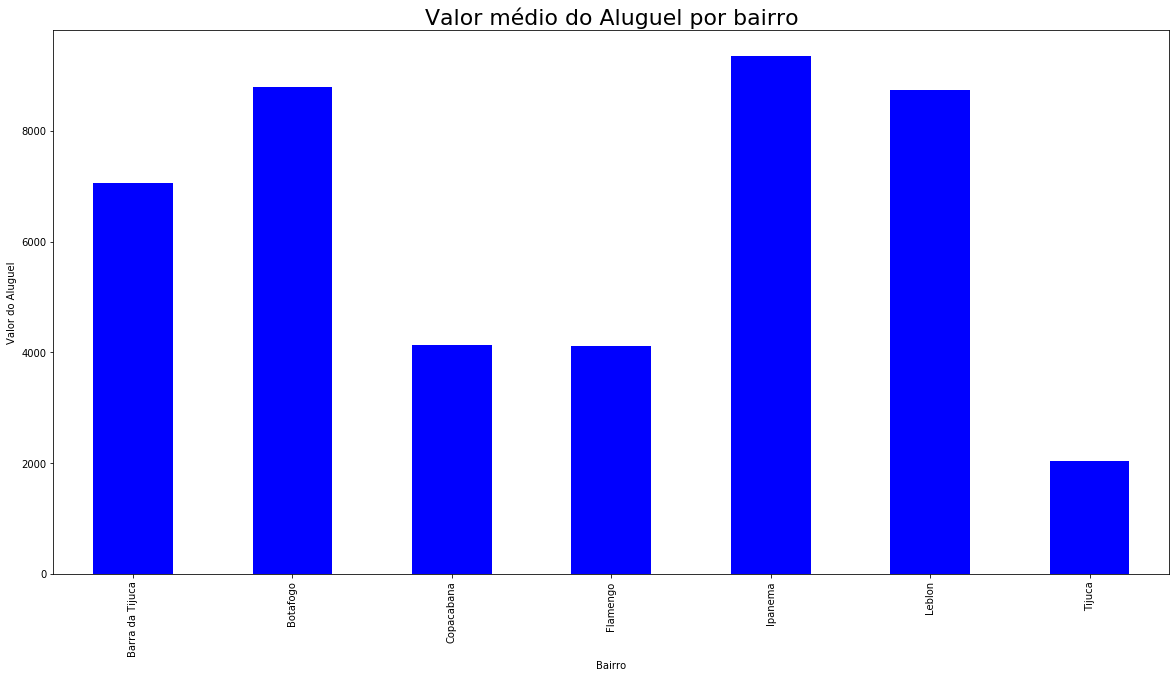

In [142]:
# gráfico de valor médio por bairro
fig = grupo_bairro['Valor'].mean().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor médio do Aluguel por bairro', {'fontsize':22})

Text(0.5, 1.0, 'Valor médio do Aluguel por bairro')

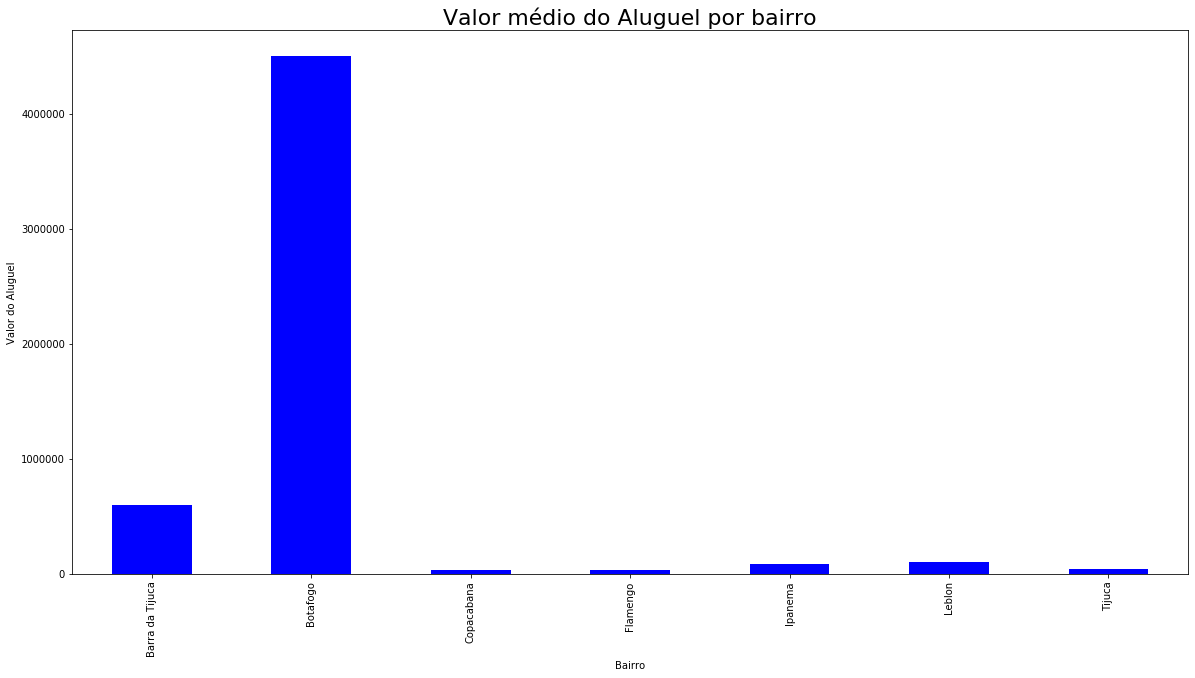

In [143]:
# gráfico de valor máximo por bairro
fig = grupo_bairro['Valor'].max().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor médio do Aluguel por bairro', {'fontsize':22})

## Criando faixas de valor  

In [6]:
# 0 à 2 quartos
# 3 à 4 quartos
# 5 à 6 quartos
# mais que 6 quartos
classes = [0, 2, 4, 6, 100]

In [7]:
quartos = pd.cut(dados.Quartos, classes)

In [9]:
pd.value_counts(quartos)

(0, 2]      11250
(2, 4]       9681
(4, 6]        686
(6, 100]       50
Name: Quartos, dtype: int64

In [10]:
# incluindo labels para cada faixa

In [11]:
texto_labels = ['0 à 2 quartos', '3 à 4 quartos', '5 à 6 quartos', 'mais que 6 quartos']

In [14]:
quartos = pd.cut(dados.Quartos, classes, labels = texto_labels, include_lowest = True)  #  também incluir menor valor na menor faixa

In [15]:
pd.value_counts(quartos)

0 à 2 quartos         11409
3 à 4 quartos          9681
5 à 6 quartos           686
mais que 6 quartos       50
Name: Quartos, dtype: int64